In [128]:
import numpy as np
import pandas as pd
%matplotlib inline

## Apple vs Pears

Считаем данные из csv файла с помощью библиотеки pandas:

In [129]:
data = pd.read_csv("apple_pears.csv")
data.head() #data.head(n)

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


Посмотрим на распределения признаков:

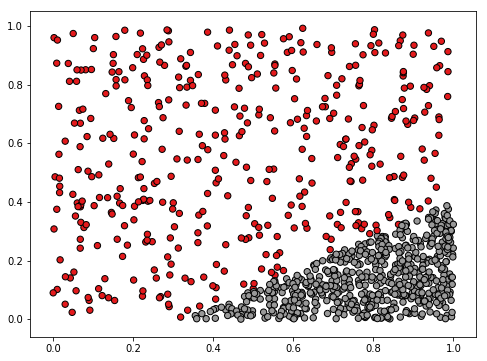

In [130]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(data.values[:, 0], data.values[:, 1], c=data.values[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)

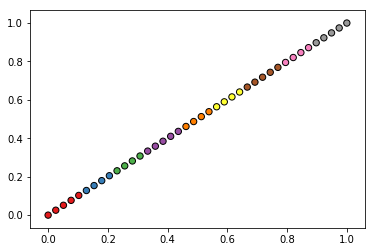

In [131]:
x = np.linspace(0.0, 1.0, 40)

plt.scatter(x, x, c=x,  cmap=plt.cm.Set1, edgecolor='k', s=40)

### Train-test split

In [132]:
target = np.array(data[['target']])
features = np.array(data[['yellowness', 'symmetry']])

Чтобы обучить и оценить качество нашей модели, нужно разбить данные на тренировочную и тестовую выборки. В этом нам поможет функция train_test_split из библиотеки sklearn:

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.15, random_state=37)

print(X_train.shape)
print(X_test.shape)

(850, 2)
(150, 2)


### KNN

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [135]:
from sklearn.neighbors import KNeighborsClassifier

Собственно, обучим KNeighboursClassifier на тренировочных данных и посмотрим, че предскажет

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
knn.predict(X_test)

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

Посчитаем метрику качества -- например, accuracy. Для этого в sklearn тоже есть функция:

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(knn.predict(X_test), Y_test)

1.0

#### Hmmmmmmm, 1!!!!

Это нормально? Это хорошо?

Давайте разбираться. Для этого посмотрим на то, какие примеры были отнесены к какому классу нашим алгоритмом:

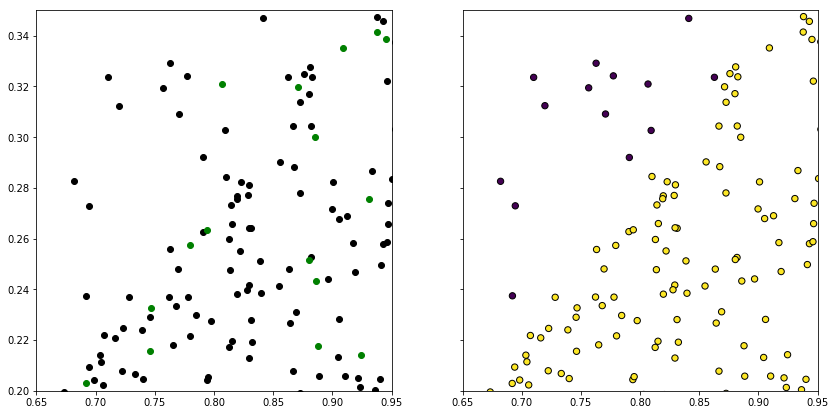

In [139]:
min_x, max_x = 0.65, 0.95 #0.65, 0.95 #<- uncomment this to see part of the plot closer
min_y, max_y = 0.2, 0.35 #0.2, 0.35  #<- uncomment this to see part of the plot closer

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))

ax1.scatter(X_train[:, 0], X_train[:, 1], color='k')
ax1.scatter(X_test[:, 0], X_test[:, 1], color='g')

ax1.set_ylim(min_y, max_y)
ax1.set_xlim(min_x, max_x)

ax2.scatter(data.values[:, 0], data.values[:, 1], c=data.values[:, 2], edgecolor='k', s=40)

ax2.set_ylim(min_y, max_y)
ax2.set_xlim(min_x, max_x)

plt.show()

Теперь мы понимаем, что нам просто повезло с seed (random_state) в train_test_split, при разбиении данных. Слишком "хороший" тест-сет получился.

#### Вопрос: как бороться с такой проблемой?

P.S. try http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [140]:
cross_val_score(KNeighborsClassifier(n_neighbors=5), X_test, Y_test.ravel(), cv=3)

array([0.98039216, 0.96      , 0.97959184])

Давайте ради интереса посмотрим на то, насколько хорошо будет работать KNN на нашей задаче при разных значениях параметра n_neighbors:

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.15, random_state=15)

In [146]:
results = []
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, Y_train.ravel())
    results.append(accuracy_score(knn.predict(X_test), Y_test))

In [147]:
results_cv = []
for n_neighbors in range(1, 11):
    results_cv.append(cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X_test, Y_test.ravel(), cv=3))

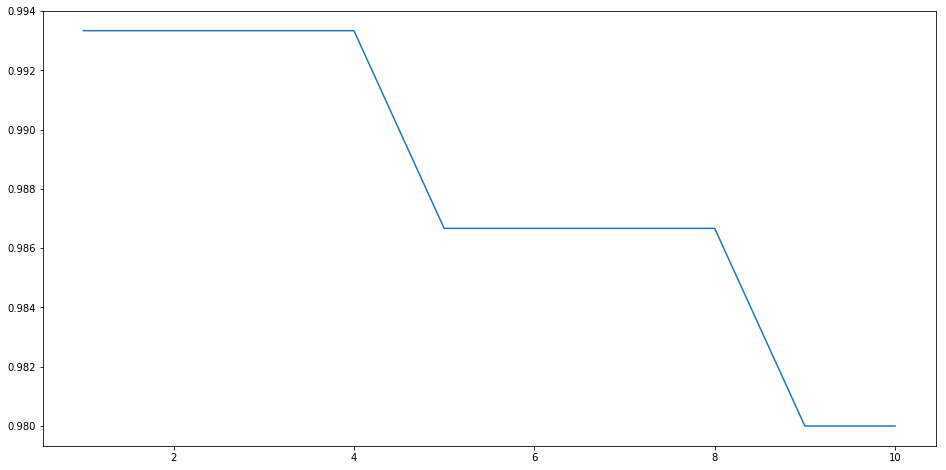

In [148]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(1, 11)), results)
plt.show()

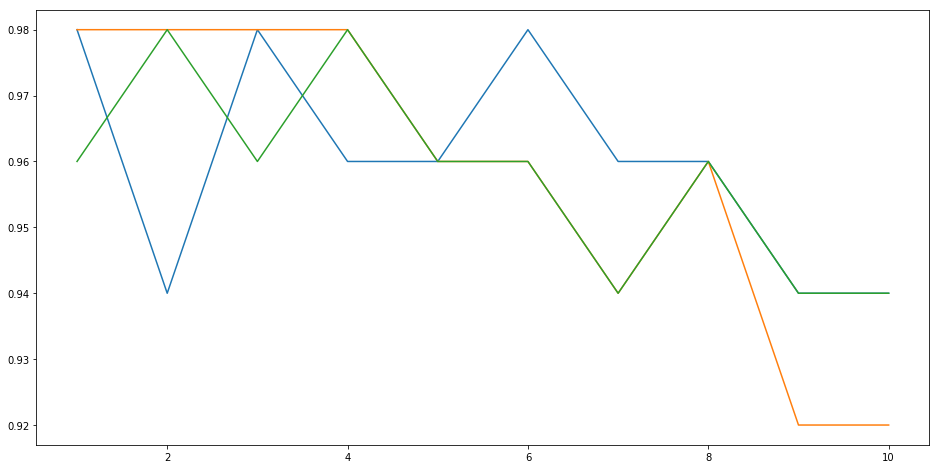

In [149]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(1, 11)), results_cv)
plt.show()

#### Подумайте: почему n_neighbors=2 самое бесполезное значение параметра

------------------

## Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

Обратите внимание --для этой задачи данные уже разбиты на train и test выборки и помещены в отдельные файлы

In [90]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
train_data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [76]:
X_train, Y_train = np.array(train_data.drop(["id", "cardio"], axis=1)), np.array(train_data['cardio'])

<do something with KNN>

In [78]:
train_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
test_data = pd.read_csv("test_med.csv", delimiter=';')
test_data.head()
test_data.shape
test_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,None,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,None,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [96]:
train_data[train_data.smoke > 0].count()

id             6169
age            6169
gender         6169
height         6169
weight         6169
ap_hi          6169
ap_lo          6169
cholesterol    6169
gluc           6169
smoke          6169
alco           6169
active         6169
cardio         6169
dtype: int64

In [98]:
train_data[(train_data.smoke > 0) & (train_data.cardio > 0)].count()

id             2929
age            2929
gender         2929
height         2929
weight         2929
ap_hi          2929
ap_lo          2929
cholesterol    2929
gluc           2929
smoke          2929
alco           2929
active         2929
cardio         2929
dtype: int64

In [88]:
train_data[(train_data.cardio > 0) & (train_data.alco > 0)]['alco'].count()

1823

In [89]:
train_data[(train_data.cardio > 0) & (train_data.active > 0)]['active'].count()

27618

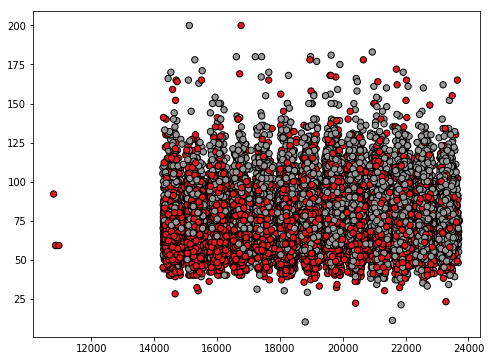

In [109]:
fig2 = plt.figure(1, figsize=(8, 6))
plt.scatter(train_data['age'].values, train_data['weight'].values, c=train_data['cardio'].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

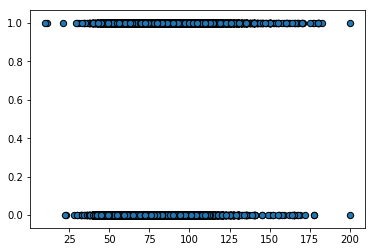

In [111]:
plt.scatter(train_data['weight'].values, train_data['cardio'].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

In [112]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train, Y_train, test_size=0.15, random_state=15)

In [116]:
results2 = []
for n_neighbors in range(1, 11):
    knn2 = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train2, Y_train2.ravel())
    results2.append(accuracy_score(knn.predict(X_test2), Y_test2))

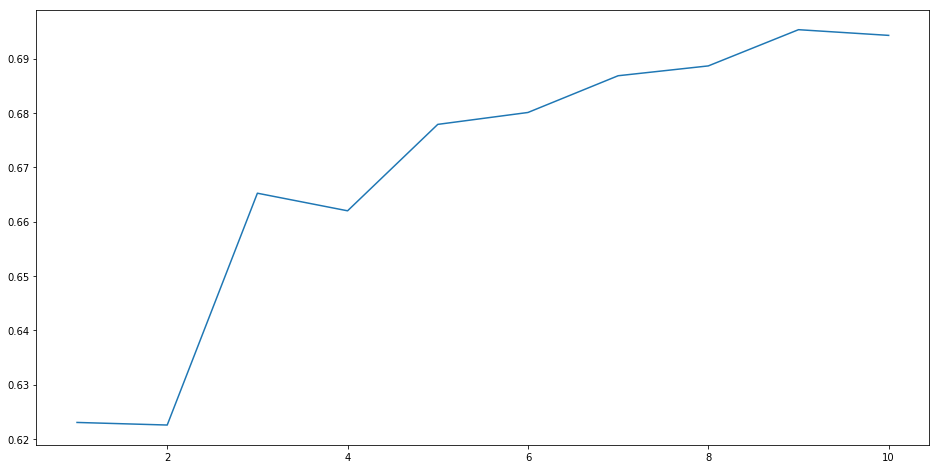

In [117]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(1, 11)), results)
plt.show()

In [121]:
from sklearn.model_selection import cross_val_score

results3 = []
for n_neighbors in range(1, 11):
    knn3 = KNeighborsClassifier(n_neighbors=n_neighbors)
    results3.append(cross_val_score(knn3, X_train2, Y_train2, cv=4))

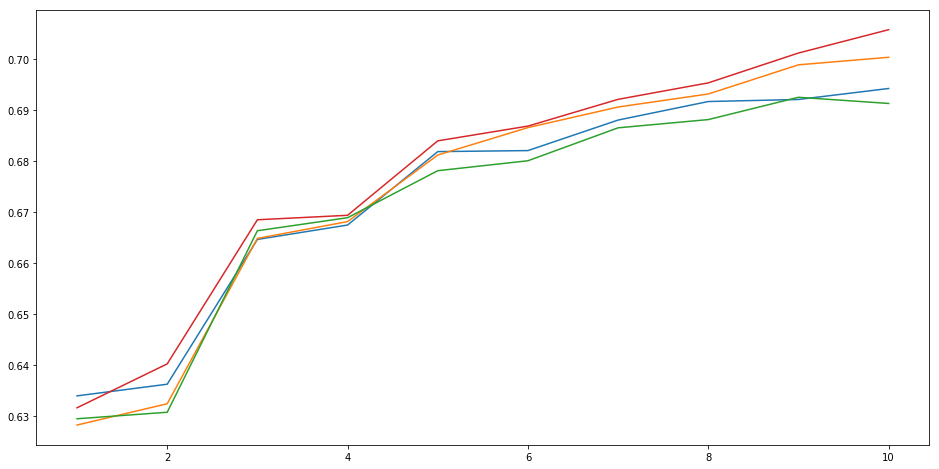

In [123]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(1, 11)), results3)
plt.show()